In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [87]:
cars= pd.read_csv('Cars93.csv')

In [6]:
cars[['Weight', 'MPG.highway']].corr()

,Weight,MPG.highway
Weight,1.000000,-0.810658
MPG.highway,-0.810658,1.000000


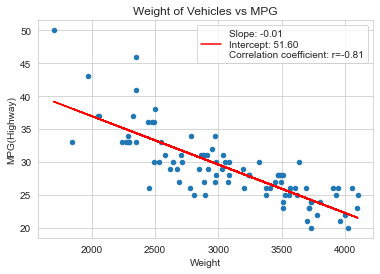

In [11]:
sns.set_style('whitegrid') #grid
ax = cars.plot(title = 'Weight of Vehicles vs MPG', kind='scatter', x='Weight', y='MPG.highway') #plot
ax.set_xlabel('Weight') #x label
ax.set_ylabel('MPG(Highway)') #y label
x = cars['Weight'].to_numpy() #x value
y = cars['MPG.highway'].to_numpy() #y value
slope, intercept, r, p, stderr = scipy.stats.linregress(x,y) #calculate linear regression
line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}' #Display factors
ax.plot(x, intercept + slope * x, label=line, color='red') #add slope line
ax.legend(facecolor='white') #set up legend
plt.show() #show plot

In [88]:
cars_multi = cars.copy()

In [13]:
cars_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [14]:
cars_multi.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [29]:
cars_multi['Make'].value_counts()

Acura Integra               1
Mercury Capri               1
Oldsmobile Cutlass_Ciera    1
Oldsmobile Achieva          1
Nissan Maxima               1
                           ..
Eagle Vision                1
Eagle Summit                1
Dodge Stealth               1
Dodge Dynasty               1
Volvo 850                   1
Name: Make, Length: 93, dtype: int64

In [30]:
cars_multi.drop('Unnamed: 0', axis = 1, inplace = True)
cars_multi.drop('Make', axis=1, inplace=True)

In [92]:
cars_multi['Rear.seat.room'] = cars_multi['Rear.seat.room'].fillna(0)
cars_multi['Luggage.room'] = cars_multi['Luggage.room'].fillna(0)
cars_multi['Luggage.room'].unique()

array([11., 15., 14., 17., 13., 16., 21., 18.,  0., 20., 12., 10.,  8.,
        9., 19., 22.,  6.])

In [93]:
x = cars_multi.copy()
x.drop('MPG.highway', axis=1, inplace=True)
x = pd.get_dummies(x, drop_first=True)

In [94]:
y = cars_multi['MPG.highway'].copy()

In [101]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state = 0)

In [135]:
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_test, y_test)

0.8279098269289377

In [136]:
y_predict = reg.predict(x_test)
y_predict

array([26.86377131, 36.00063493, 23.77521616, 19.99763177, 27.41675556,
       26.65938867, 34.98683708, 32.76064188, 28.62538221, 27.8628773 ,
       34.52518373, 25.49622917, 24.42573132, 27.28641597, 34.74374244,
       29.89349421, 27.2831415 , 35.07041703, 30.70836831, 26.38072326,
       27.9881937 , 31.59124718, 28.75635507, 27.8824849 ])

Text(0.5, 1.0, 'Predicted Values vs Actual Values')

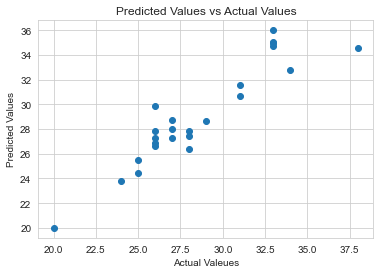

In [138]:
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Valeues')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Actual Values')

In [139]:
residuals = y_test - y_predict

Text(0.5, 1.0, 'Residual Plot')

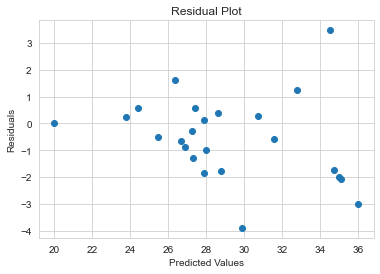

In [140]:
plt.scatter(y_predict, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [131]:
reg.coef_

array([ 4.08259870e-03, -2.17044140e-02, -7.22096217e-02,  4.96402342e-02,
        8.67207281e-01, -9.22814478e-02,  2.11416998e-03, -1.28330913e-04,
       -7.69517483e-04, -4.36812160e-02, -4.56831304e-01,  4.36609279e-02,
        1.02243188e-01,  3.15578488e-02, -8.15012064e-04, -9.51077474e-02,
        1.42846334e-01, -1.37439389e-03,  2.58466804e-01,  6.50158707e-01,
        5.00726886e-01,  7.35096863e-01,  8.28655137e-01,  2.14052928e-03,
       -6.41101401e-01, -7.10347750e-01, -6.12457717e-01, -7.40039437e-01,
        5.73656944e-01, -2.98609278e-01,  5.31121444e-02, -3.38974476e-01,
       -3.48230868e-01,  1.16737282e-01,  8.07278918e-01,  5.09651023e-01,
       -1.20111508e+00, -8.14374652e-01, -6.60318963e-01, -7.60815558e-03,
        1.41979690e-01,  5.65581917e-01, -3.86354736e-01,  9.80035736e-01,
       -2.10484001e-01,  3.36457282e-02, -1.17882936e-01,  6.88293601e-01,
        2.51658044e-01,  1.06344380e+00, -1.61014923e-01, -5.53792665e-01,
        9.94701907e-02,  